# Thyroid TSH Analysis

In [528]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [529]:
conn = MySQLdb.connect(host = 'localhost', user = 'root', passwd = 'mysql')

In [530]:
cursor = conn.cursor()

In [531]:
cursor.execute('use health_camp')

0

In [532]:
cursor.execute('select age, eating_habits, gender, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13, Q14, Q15, Q16, Q29, Q30, Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, R_TSH, R_B12 from profile, questions, reports where profile.P_Id = questions.P_Id and questions.R_Id = reports.R_Id and R_TSH != "NULL"')
TSH = pd.DataFrame(list(cursor.fetchall()), columns = ['Age', 'Eating Habits', 'Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'R_TSH', 'R_B12'])
TSH.head()

,Age,Eating Habits,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,R_TSH,R_B12
0,38,Vegetarian,Female,1,1,1,1,1,0,0,...,1,0,Household,0,1.0,0.0,0.0,0,0,0
1,38,Vegetarian,Male,0,0,0,1,1,1,0,...,0,0,Office,0,0.0,0.0,1.0,0,0,1
2,20,Vegetarian,Female,0,0,0,0,0,0,0,...,0,0,Household,1,0.0,0.0,NaN,0,0,None
3,25,Non - Vegetarian,Female,1,0,0,0,1,0,0,...,1,0,Outdoor,1,0.0,0.0,0.0,0,0,None
4,51,Non - Vegetarian,Female,0,0,0,0,1,0,0,...,1,0,Office,1,0.0,0.0,0.0,0,0,0


In [533]:
TSH.describe()

,Age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q16,Q29,Q30,Q31,Q32,Q34,Q35,Q36,Q37,Q38
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,62.000000,63.000000,...,63.000000,63.000000,62.000000,63.000000,63.000000,63.000000,62.000000,55.000000,62.000000,63.000000
mean,47.444444,0.523810,0.222222,0.285714,0.412698,0.380952,0.301587,0.476190,0.370968,0.380952,...,0.301587,0.285714,0.387097,0.444444,0.047619,0.650794,0.451613,0.109091,0.322581,0.206349
std,14.731771,0.503444,0.419079,0.455383,0.496274,0.489522,0.462633,0.503444,0.487007,0.489522,...,0.462633,0.455383,0.491062,0.500895,0.214669,0.480548,0.501716,0.314627,0.471280,0.407935
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TSH vs Eating Habits

In [534]:
TSH['Count'] = np.repeat(1, 63)
pivot = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['Eating Habits'], aggfunc=np.sum)
pivot

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian
R_TSH,,,
0,1,10,37
1,1,3,11


In [535]:
stat = stats.chi2_contingency(pivot)
stat

(0.7811899038461539,
 0.6766541780130522,
 2,
 array([[ 1.52380952,  9.9047619 , 36.57142857],
        [ 0.47619048,  3.0952381 , 11.42857143]]))

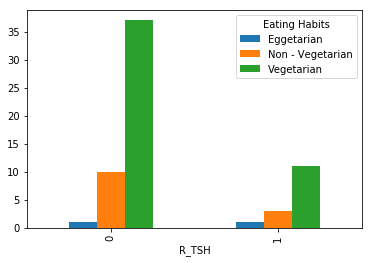

In [536]:
pivot.plot(kind='bar')

In [537]:
Total_TSH = [pivot.iloc[0, :] + pivot.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot.append(Total_TSH)
Total_EH = pivot['Eggetarian'] + pivot['Non - Vegetarian'] + pivot['Vegetarian']
piv['Total Eating Habits'] = Total_EH
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_RE = (piv['Eggetarian']/piv['Total Eating Habits'])*100
Percentage_RNV = (piv['Non - Vegetarian']/piv['Total Eating Habits'])*100
Percentage_RV = (piv['Vegetarian']/piv['Total Eating Habits'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Eggetarian'] = Percentage_RE
piv['Percentage Non - Vegetarian'] = Percentage_RNV
piv['Pecentage Vegetarian'] = Percentage_RV
piv

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian,Total Eating Habits,Percentage Eggetarian,Percentage Non - Vegetarian,Pecentage Vegetarian
0,1.0,10.000000,37.000000,48.0,2.083333,20.833333,77.083333
1,1.0,3.000000,11.000000,15.0,6.666667,20.000000,73.333333
Total TSH,2.0,13.000000,48.000000,NaN,NaN,NaN,NaN
Percentage 0,50.0,76.923077,77.083333,NaN,NaN,NaN,NaN
Percentage 1,50.0,23.076923,22.916667,NaN,NaN,NaN,NaN


### TSH vs Gender

In [538]:
pivot1 = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['Gender'], aggfunc=np.sum)
pivot1

Gender,Female,Male
R_TSH,,
0,35,13
1,8,7


In [539]:
stat1 = stats.chi2_contingency(pivot1)
stat1

(1.2199382267441858, 0.2693727753823439, 1, array([[32.76190476, 15.23809524],
        [10.23809524,  4.76190476]]))

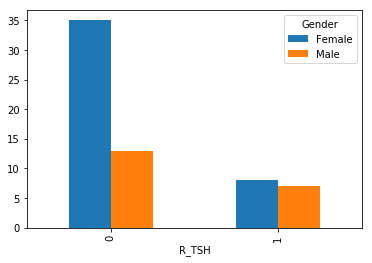

In [540]:
pivot1.plot(kind='bar')

In [541]:
Total_TSH = [pivot1.iloc[0, :] + pivot1.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot1.append(Total_TSH)
Total_Gender = pivot1['Female'] + pivot1['Male']
piv['Total Gender'] = Total_Gender
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv['Female']/piv['Total Gender'])*100
Percentage_R1 = (piv['Male']/piv['Total Gender'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Female'] = Percentage_R0
piv['Percentage Male'] = Percentage_R1
piv

Gender,Female,Male,Total Gender,Percentage Female,Percentage Male
0,35.000000,13.0,48.0,72.916667,27.083333
1,8.000000,7.0,15.0,53.333333,46.666667
Total TSH,43.000000,20.0,NaN,NaN,NaN
Percentage 0,81.395349,65.0,NaN,NaN,NaN
Percentage 1,18.604651,35.0,NaN,NaN,NaN


In [542]:
Q = ((piv.iloc[1, 0] * piv.iloc[0, 1]) - (piv.iloc[1, 1] * piv.iloc[0, 0]))/((piv.iloc[1, 0] * piv.iloc[0, 1]) + (piv.iloc[1, 1] * piv.iloc[0, 0]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.4040114613180516
Odd's Ratio:  0.42448979591836733


### TSH vs Junk Food Consumption

In [543]:
pivot2 = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['Q29'], aggfunc=np.sum)
pivot2

Q29,0,1
R_TSH,,
0,35,13
1,10,5


In [544]:
stat2 = stats.chi2_contingency(pivot2)
stat2

(0.01968749999999997, 0.888413363396001, 1, array([[34.28571429, 13.71428571],
        [10.71428571,  4.28571429]]))

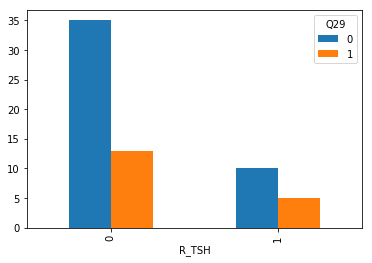

In [545]:
pivot2.plot(kind='bar')

In [546]:
Total_TSH = [pivot2.iloc[0, :] + pivot2.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot2.append(Total_TSH)
Total_JFC = pivot2.iloc[:, 0] + pivot2.iloc[:, 1]
piv['Total JFC'] = Total_JFC
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total JFC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total JFC'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q29,0,1,Total JFC,Percentage 0,Percentage 1
0,35.000000,13.000000,48.0,72.916667,27.083333
1,10.000000,5.000000,15.0,66.666667,33.333333
Total TSH,45.000000,18.000000,NaN,NaN,NaN
Percentage 0,77.777778,72.222222,NaN,NaN,NaN
Percentage 1,22.222222,27.777778,NaN,NaN,NaN


In [547]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.14754098360655737
Odd's Ratio:  0.7428571428571429


### TSH vs Thyroid History in Family

In [548]:
pivot3 = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['Q38'], aggfunc=np.sum)
pivot3

Q38,0,1
R_TSH,,
0,38,10
1,12,3


In [549]:
stat3 = stats.chi2_contingency(pivot3)
stat3

(0.08753365384615389, 0.7673363358448214, 1, array([[38.0952381,  9.9047619],
        [11.9047619,  3.0952381]]))

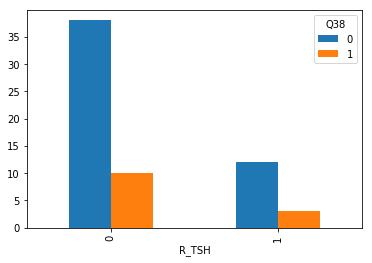

In [550]:
pivot3.plot(kind='bar')

In [551]:
Total_TSH = [pivot3.iloc[0, :] + pivot3.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot3.append(Total_TSH)
Total_FH = pivot3.iloc[:, 0] + pivot3.iloc[:, 1]
piv['Total FH'] = Total_FH
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total FH'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total FH'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q38,0,1,Total FH,Percentage 0,Percentage 1
0,38.0,10.000000,48.0,79.166667,20.833333
1,12.0,3.000000,15.0,80.000000,20.000000
Total TSH,50.0,13.000000,NaN,NaN,NaN
Percentage 0,76.0,76.923077,NaN,NaN,NaN
Percentage 1,24.0,23.076923,NaN,NaN,NaN


In [552]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.02564102564102564
Odd's Ratio:  1.0526315789473684


### TSH vs Vitamin B12

In [553]:
pivot4 = pd.pivot_table(TSH, values = 'Count', index = ['R_TSH'], columns = ['R_B12'], aggfunc = np.sum)
pivot4

R_B12,0,1
R_TSH,,
0,23,6
1,5,3


In [554]:
stat4 = stats.chi2_contingency(pivot4)
stat4

(0.26596281472359057, 0.6060528985667053, 1, array([[21.94594595,  7.05405405],
        [ 6.05405405,  1.94594595]]))

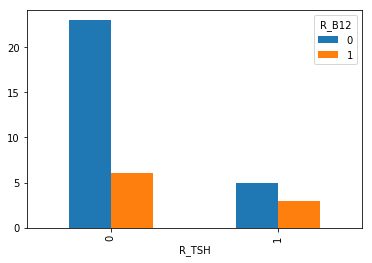

In [555]:
pivot4.plot(kind = 'bar')

In [556]:
Total_TSH = [pivot4.iloc[0, :] + pivot4.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot4.append(Total_TSH)
Total_B12 = pivot4.iloc[:, 0] + pivot4.iloc[:, 1]
piv['Total B12'] = Total_B12
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total B12'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total B12'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

R_B12,0,1,Total B12,Percentage 0,Percentage 1
0,23.000000,6.000000,29.0,79.310345,20.689655
1,5.000000,3.000000,8.0,62.500000,37.500000
Total TSH,28.000000,9.000000,NaN,NaN,NaN
Percentage 0,82.142857,66.666667,NaN,NaN,NaN
Percentage 1,17.857143,33.333333,NaN,NaN,NaN


In [557]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.3939393939393939
Odd's Ratio:  0.43478260869565216


### TSH vs Supplement Consumptions

In [558]:
pivot5 = pd.pivot_table(TSH, values = 'Count', index = ['R_TSH'], columns = ['Q30'], aggfunc = np.sum)
pivot5

Q30,0.0,1.0
R_TSH,,
0,33,14
1,5,10


In [559]:
stat5 = stats.chi2_contingency(pivot5)
stat5

(5.056834017668285, 0.024529008299616302, 1, array([[28.80645161, 18.19354839],
        [ 9.19354839,  5.80645161]]))

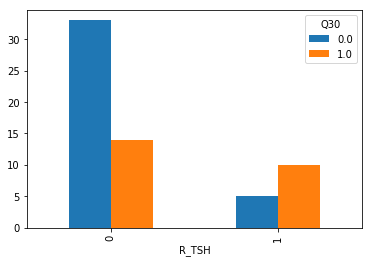

In [560]:
pivot5.plot(kind = 'bar')

In [561]:
Total_TSH = [pivot5.iloc[0, :] + pivot5.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot5.append(Total_TSH)
Total_SC = pivot5.iloc[:, 0] + pivot5.iloc[:, 1]
piv['Total SC'] = Total_SC
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total SC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total SC'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q30,0.0,1.0,Total SC,Percentage 0,Percentage 1
0,33.000000,14.000000,47.0,70.212766,29.787234
1,5.000000,10.000000,15.0,33.333333,66.666667
Total TSH,38.000000,24.000000,NaN,NaN,NaN
Percentage 0,86.842105,58.333333,NaN,NaN,NaN
Percentage 1,13.157895,41.666667,NaN,NaN,NaN


In [562]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.65
Odd's Ratio:  0.21212121212121213


### TSH vs Pain

In [563]:
pivot6 = pd.pivot_table(TSH, values = 'Count', index = ['R_TSH'], columns = ['Q31'], aggfunc = np.sum)
pivot6

Q31,0,1
R_TSH,,
0,26,22
1,9,6


In [564]:
stat6 = stats.chi2_contingency(pivot6)
stat6

(0.009843750000000024,
 0.9209670300785183,
 1,
 array([[26.66666667, 21.33333333],
        [ 8.33333333,  6.66666667]]))

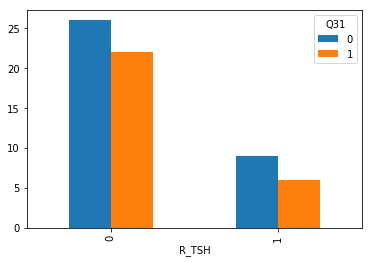

In [565]:
pivot6.plot(kind = 'bar')

In [566]:
Total_TSH = [pivot6.iloc[0, :] + pivot6.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot6.append(Total_TSH)
Total_Pain = pivot6.iloc[:, 0] + pivot6.iloc[:, 1]
piv['Total Pain'] = Total_Pain
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total Pain'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total Pain'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q31,0,1,Total Pain,Percentage 0,Percentage 1
0,26.000000,22.000000,48.0,54.166667,45.833333
1,9.000000,6.000000,15.0,60.000000,40.000000
Total TSH,35.000000,28.000000,NaN,NaN,NaN
Percentage 0,74.285714,78.571429,NaN,NaN,NaN
Percentage 1,25.714286,21.428571,NaN,NaN,NaN


In [567]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.11864406779661017
Odd's Ratio:  1.2692307692307692


### TSH vs RO Water Consumption

In [568]:
pivot7 = pd.pivot_table(TSH, values = 'Count', index = ['R_TSH'], columns = ['Q34'], aggfunc = np.sum)
pivot7

Q34,0,1
R_TSH,,
0,18,30
1,4,11


In [569]:
stat7 = stats.chi2_contingency(pivot7)
stat7

(0.20975263303769376, 0.6469613567831611, 1, array([[16.76190476, 31.23809524],
        [ 5.23809524,  9.76190476]]))

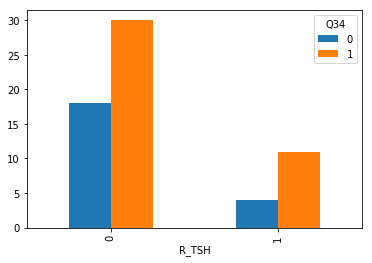

In [570]:
pivot7.plot(kind = 'bar')

In [571]:
Total_TSH = [pivot7.iloc[0, :] + pivot7.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot7.append(Total_TSH)
Total_RO = pivot7.iloc[:, 0] + pivot7.iloc[:, 1]
piv['Total RO'] = Total_RO
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total RO'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total RO'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q34,0,1,Total RO,Percentage 0,Percentage 1
0,18.000000,30.000000,48.0,37.500000,62.500000
1,4.000000,11.000000,15.0,26.666667,73.333333
Total TSH,22.000000,41.000000,NaN,NaN,NaN
Percentage 0,81.818182,73.170732,NaN,NaN,NaN
Percentage 1,18.181818,26.829268,NaN,NaN,NaN


In [572]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.24528301886792453
Odd's Ratio:  0.6060606060606061


### TSH vs Excessive Blood Loss during Menstruation

In [573]:
pivot8 = pd.pivot_table(TSH[TSH['Gender'] == 'Female'], values = 'Count', index = ['R_TSH'], columns = ['Q36'], aggfunc = np.sum)
pivot8

Q36,0.0,1.0
R_TSH,,
0,30,4
1,7,1


In [574]:
stat8 = stats.chi2_contingency(pivot8)
stat8

(0.30131160572337046, 0.5830613278388281, 1, array([[29.95238095,  4.04761905],
        [ 7.04761905,  0.95238095]]))

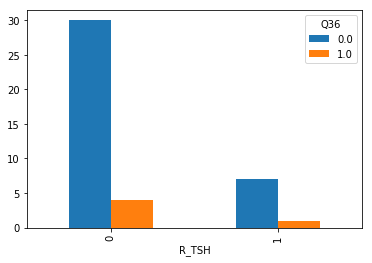

In [575]:
pivot8.plot(kind = 'bar')

In [576]:
Total_TSH = [pivot8.iloc[0, :] + pivot8.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot8.append(Total_TSH)
Total_BL = pivot8.iloc[:, 0] + pivot8.iloc[:, 1]
piv['Total BL'] = Total_BL
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total BL'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total BL'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q36,0.0,1.0,Total BL,Percentage 0,Percentage 1
0,30.000000,4.0,34.0,88.235294,11.764706
1,7.000000,1.0,8.0,87.500000,12.500000
Total TSH,37.000000,5.0,NaN,NaN,NaN
Percentage 0,81.081081,80.0,NaN,NaN,NaN
Percentage 1,18.918919,20.0,NaN,NaN,NaN


In [577]:
Q = ((piv.iloc[1, 1] * piv.iloc[0, 0]) - (piv.iloc[1, 0] * piv.iloc[0, 1]))/((piv.iloc[1, 1] * piv.iloc[0, 0]) + (piv.iloc[1, 0] * piv.iloc[0, 1]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.034482758620689655
Odd's Ratio:  0.9333333333333333


### TSH vs Age Group

In [578]:
Age_Group = []
for i in range(len(TSH['Age'])):
    if TSH.iloc[i, 0] <= 30:
        Age_Group.append('11 to 30')
    elif TSH.iloc[i, 0] <= 50:
        Age_Group.append('31 to 50')
    elif TSH.iloc[i, 0] <= 70:
        Age_Group.append('51 to 70')
    else:
        Age_Group.append('More than 70')

In [579]:
Age_Group = pd.DataFrame([Age_Group]).T
Age_Group

,0
0,31 to 50
1,31 to 50
2,11 to 30
3,11 to 30
4,51 to 70
5,31 to 50
6,51 to 70
7,51 to 70
8,More than 70
9,31 to 50


In [580]:
TSH['Age_Group'] = Age_Group

In [581]:
TSH.head()

,Age,Eating Habits,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q33,Q34,Q35,Q36,Q37,Q38,R_TSH,R_B12,Count,Age_Group
0,38,Vegetarian,Female,1,1,1,1,1,0,0,...,Household,0,1.0,0.0,0.0,0,0,0,1,31 to 50
1,38,Vegetarian,Male,0,0,0,1,1,1,0,...,Office,0,0.0,0.0,1.0,0,0,1,1,31 to 50
2,20,Vegetarian,Female,0,0,0,0,0,0,0,...,Household,1,0.0,0.0,NaN,0,0,None,1,11 to 30
3,25,Non - Vegetarian,Female,1,0,0,0,1,0,0,...,Outdoor,1,0.0,0.0,0.0,0,0,None,1,11 to 30
4,51,Non - Vegetarian,Female,0,0,0,0,1,0,0,...,Office,1,0.0,0.0,0.0,0,0,0,1,51 to 70


In [582]:
pivot9 = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['Age_Group'], aggfunc=np.sum)
pivot9.fillna(0, inplace = True)
pivot9

Age_Group,11 to 30,31 to 50,51 to 70,More than 70
R_TSH,,,,
0,9.0,17.0,20.0,2.0
1,1.0,7.0,7.0,0.0


In [583]:
stat9 = stats.chi2_contingency(pivot9)
stat9

(2.1226041666666666,
 0.5473533398133779,
 3,
 array([[ 7.61904762, 18.28571429, 20.57142857,  1.52380952],
        [ 2.38095238,  5.71428571,  6.42857143,  0.47619048]]))

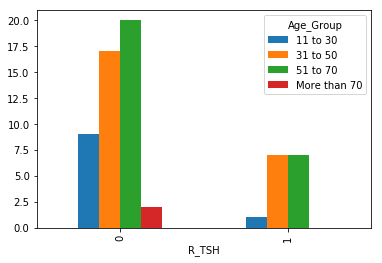

In [584]:
pivot9.plot(kind='bar')

In [585]:
Total_TSH = [pivot9.iloc[0, :] + pivot9.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot9.append(Total_TSH)
Total_AG = pivot9['11 to 30'] + pivot9['31 to 50'] + pivot9['51 to 70'] + pivot9['More than 70']
piv['Total Age Groups'] = Total_AG
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R1 = (piv['11 to 30']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['31 to 50']/piv['Total Age Groups'])*100
Percentage_R3 = (piv['51 to 70']/piv['Total Age Groups'])*100
Percentage_R4 = (piv['More than 70']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 11 to 30'] = Percentage_R1
piv['Percentage 31 to 50'] = Percentage_R2
piv['Percentage 51 to 70'] = Percentage_R3
piv['Percentage More than 70'] = Percentage_R4
piv

Age_Group,11 to 30,31 to 50,51 to 70,More than 70,Total Age Groups,Percentage 11 to 30,Percentage 31 to 50,Percentage 51 to 70,Percentage More than 70
0,9.0,17.000000,20.000000,2.0,48.0,18.750000,35.416667,41.666667,4.166667
1,1.0,7.000000,7.000000,0.0,15.0,6.666667,46.666667,46.666667,0.000000
Total TSH,10.0,24.000000,27.000000,2.0,NaN,NaN,NaN,NaN,NaN
Percentage 0,90.0,70.833333,74.074074,100.0,NaN,NaN,NaN,NaN,NaN
Percentage 1,10.0,29.166667,25.925926,0.0,NaN,NaN,NaN,NaN,NaN


### Vitamin B12 vs Age Group

In [586]:
pivot10 = pd.pivot_table(TSH, values='Count', index=['R_B12'], columns=['Age_Group'], aggfunc=np.sum)
pivot10.fillna(0, inplace = True)
pivot10

Age_Group,11 to 30,31 to 50,51 to 70,More than 70
R_B12,,,,
0,2.0,12.0,13.0,1.0
1,2.0,3.0,4.0,0.0


In [587]:
stat10 = stats.chi2_contingency(pivot10)
stat10

(1.9121848739495797,
 0.5908315604185992,
 3,
 array([[ 3.02702703, 11.35135135, 12.86486486,  0.75675676],
        [ 0.97297297,  3.64864865,  4.13513514,  0.24324324]]))

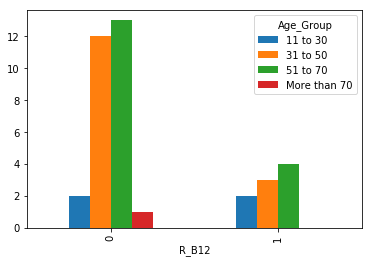

In [588]:
pivot10.plot(kind='bar')

In [589]:
Total_B12 = [pivot10.iloc[0, :] + pivot10.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot10.append(Total_B12)
Total_AG = pivot10['11 to 30'] + pivot10['31 to 50'] + pivot10['51 to 70'] + pivot10['More than 70']
piv['Total Age Groups'] = Total_AG
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R1 = (piv['11 to 30']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['31 to 50']/piv['Total Age Groups'])*100
Percentage_R3 = (piv['51 to 70']/piv['Total Age Groups'])*100
Percentage_R4 = (piv['More than 70']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage 11 to 30'] = Percentage_R1
piv['Percentage 31 to 50'] = Percentage_R2
piv['Percentage 51 to 70'] = Percentage_R3
piv['Percentage More than 70'] = Percentage_R4
piv

Age_Group,11 to 30,31 to 50,51 to 70,More than 70,Total Age Groups,Percentage 11 to 30,Percentage 31 to 50,Percentage 51 to 70,Percentage More than 70
0,2.0,12.0,13.000000,1.0,28.0,7.142857,42.857143,46.428571,3.571429
1,2.0,3.0,4.000000,0.0,9.0,22.222222,33.333333,44.444444,0.000000
Total B12,4.0,15.0,17.000000,1.0,NaN,NaN,NaN,NaN,NaN
Percentage 0,50.0,80.0,76.470588,100.0,NaN,NaN,NaN,NaN,NaN
Percentage 1,50.0,20.0,23.529412,0.0,NaN,NaN,NaN,NaN,NaN


### TSH vs Age Group Less than and Greater than 50

In [590]:
A_G = []
for i in range(len(TSH['Age'])):
    if TSH.iloc[i, 0] <= 50:
        A_G.append('Less than or equal to 50')
    else:
        A_G.append('More than 50')

In [591]:
A_G = pd.DataFrame([A_G]).T
A_G.head()

,0
0,Less than or equal to 50
1,Less than or equal to 50
2,Less than or equal to 50
3,Less than or equal to 50
4,More than 50


In [592]:
TSH['A_G'] = A_G

In [593]:
pivot11 = pd.pivot_table(TSH, values='Count', index=['R_TSH'], columns=['A_G'], aggfunc=np.sum)
pivot11.fillna(0, inplace = True)
pivot11

A_G,Less than or equal to 50,More than 50
R_TSH,,
0,26,22
1,8,7


In [594]:
stat11 = stats.chi2_contingency(pivot11)
stat11

(0.057704741379310434, 0.8101611732859878, 1, array([[25.9047619, 22.0952381],
        [ 8.0952381,  6.9047619]]))

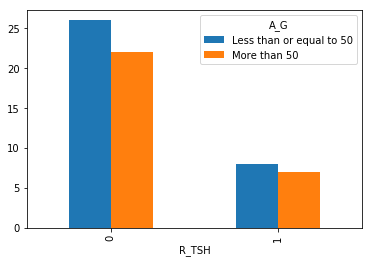

In [595]:
pivot11.plot(kind='bar')

In [596]:
Total_TSH = [pivot11.iloc[0, :] + pivot11.iloc[1, :]]
Total_TSH = pd.DataFrame(Total_TSH, index = ['Total TSH'])
piv = pivot11.append(Total_TSH)
Total_AG = pivot11['Less than or equal to 50'] + pivot11['More than 50']
piv['Total Age Groups'] = Total_AG
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R1 = (piv['Less than or equal to 50']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['More than 50']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Less than or equal to 50'] = Percentage_R1
piv['Percentage More than 50'] = Percentage_R2
piv

A_G,Less than or equal to 50,More than 50,Total Age Groups,Percentage Less than or equal to 50,Percentage More than 50
0,26.000000,22.000000,48.0,54.166667,45.833333
1,8.000000,7.000000,15.0,53.333333,46.666667
Total TSH,34.000000,29.000000,NaN,NaN,NaN
Percentage 0,76.470588,75.862069,NaN,NaN,NaN
Percentage 1,23.529412,24.137931,NaN,NaN,NaN


In [597]:
Q = ((piv.iloc[1, 0] * piv.iloc[0, 1]) - (piv.iloc[1, 1] * piv.iloc[0, 0]))/((piv.iloc[1, 0] * piv.iloc[0, 1]) + (piv.iloc[1, 1] * piv.iloc[0, 0]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  -0.01675977653631285
Odd's Ratio:  0.967032967032967


### B12 vs Age Group Less than and Greater than 50

In [598]:
pivot12 = pd.pivot_table(TSH, values='Count', index=['R_B12'], columns=['A_G'], aggfunc=np.sum)
pivot12.fillna(0, inplace = True)
pivot12

A_G,Less than or equal to 50,More than 50
R_B12,,
0,14,14
1,5,4


In [599]:
stat12 = stats.chi2_contingency(pivot12)
stat12

(0.008693609022556404,
 0.9257132747290127,
 1,
 array([[14.37837838, 13.62162162],
        [ 4.62162162,  4.37837838]]))

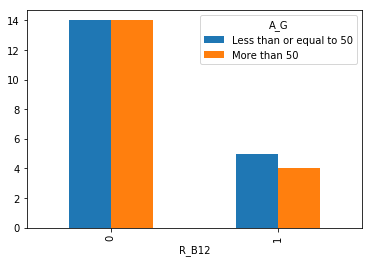

In [600]:
pivot12.plot(kind='bar')

In [601]:
Total_B12 = [pivot12.iloc[0, :] + pivot12.iloc[1, :]]
Total_B12 = pd.DataFrame(Total_B12, index = ['Total B12'])
piv = pivot12.append(Total_B12)
Total_AG = pivot12['Less than or equal to 50'] + pivot12['More than 50']
piv['Total Age Groups'] = Total_AG
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[2, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[2, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage 0'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage 1'])
Percentage_R1 = (piv['Less than or equal to 50']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['More than 50']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv['Percentage Less than or equal to 50'] = Percentage_R1
piv['Percentage More than 50'] = Percentage_R2
piv

A_G,Less than or equal to 50,More than 50,Total Age Groups,Percentage Less than or equal to 50,Percentage More than 50
0,14.000000,14.000000,28.0,50.000000,50.000000
1,5.000000,4.000000,9.0,55.555556,44.444444
Total B12,19.000000,18.000000,NaN,NaN,NaN
Percentage 0,73.684211,77.777778,NaN,NaN,NaN
Percentage 1,26.315789,22.222222,NaN,NaN,NaN


In [602]:
Q = ((piv.iloc[1, 0] * piv.iloc[0, 1]) - (piv.iloc[1, 1] * piv.iloc[0, 0]))/((piv.iloc[1, 0] * piv.iloc[0, 1]) + (piv.iloc[1, 1] * piv.iloc[0, 0]))
print("Yule's Coefficient of Association: ", Q)
O = (piv.iloc[1, 0]*piv.iloc[0, 1])/(piv.iloc[0, 0]*piv.iloc[1, 1])
print("Odd's Ratio: ", O)

Yule's Coefficient of Association:  0.1111111111111111
Odd's Ratio:  1.25


### TSH Exploration

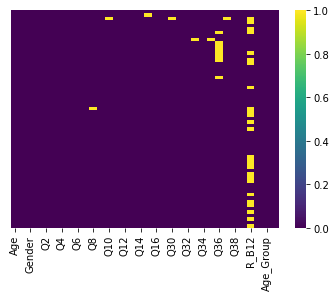

In [603]:
sns.heatmap(TSH.isnull(), yticklabels = False, cmap = 'viridis')

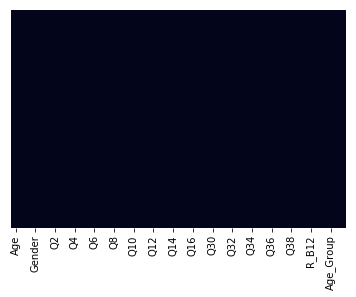

In [604]:
TSH.fillna(0, inplace = True)
sns.heatmap(TSH.isnull(), yticklabels = False, cbar  = False)

In [605]:
TSH.isnull().sum()

Age              0
Eating Habits    0
Gender           0
Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
Q6               0
Q7               0
Q8               0
Q9               0
Q10              0
Q11              0
Q12              0
Q13              0
Q14              0
Q15              0
Q16              0
Q29              0
Q30              0
Q31              0
Q32              0
Q33              0
Q34              0
Q35              0
Q36              0
Q37              0
Q38              0
R_TSH            0
R_B12            0
Count            0
Age_Group        0
A_G              0
dtype: int64

### TSH Logistic Regression

In [606]:
t = TSH
t.drop(['Age'], axis = 1, inplace = True)
t.drop(['A_G'], axis = 1, inplace = True)

In [607]:
Gender = pd.get_dummies(t['Gender'], drop_first = True)
Gender.head()

,Male
0,0
1,1
2,0
3,0
4,0


In [608]:
EH = pd.get_dummies(t['Eating Habits'], drop_first = True)
EH.head()

,Non - Vegetarian,Vegetarian
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [609]:
AG = pd.get_dummies(t['Age_Group'], drop_first = True)
AG.head()

,31 to 50,51 to 70,More than 70
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,1,0


In [610]:
t.head()

,Eating Habits,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q33,Q34,Q35,Q36,Q37,Q38,R_TSH,R_B12,Count,Age_Group
0,Vegetarian,Female,1,1,1,1,1,0,0,0.0,...,Household,0,1.0,0.0,0.0,0,0,0,1,31 to 50
1,Vegetarian,Male,0,0,0,1,1,1,0,0.0,...,Office,0,0.0,0.0,1.0,0,0,1,1,31 to 50
2,Vegetarian,Female,0,0,0,0,0,0,0,0.0,...,Household,1,0.0,0.0,0.0,0,0,0,1,11 to 30
3,Non - Vegetarian,Female,1,0,0,0,1,0,0,1.0,...,Outdoor,1,0.0,0.0,0.0,0,0,0,1,11 to 30
4,Non - Vegetarian,Female,0,0,0,0,1,0,0,0.0,...,Office,1,0.0,0.0,0.0,0,0,0,1,51 to 70


In [611]:
t.drop(['Count'], axis = 1, inplace = True)
t.drop(['Eating Habits'], axis = 1, inplace = True)
t.drop(['Gender'], axis = 1, inplace = True)
t.drop(['Q33'], axis = 1, inplace = True)
t.drop(['Q35'], axis = 1, inplace = True)
t.drop(['Q37'], axis = 1, inplace = True)
t.drop(['Age_Group'], axis = 1, inplace = True)
t.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q16,Q29,Q30,Q31,Q32,Q34,Q36,Q38,R_TSH,R_B12
0,1,1,1,1,1,0,0,0.0,1,1.0,...,1,1,0.0,1,0,0,0.0,0,0,0
1,0,0,0,1,1,1,0,0.0,0,0.0,...,0,1,0.0,0,0,0,0.0,0,0,1
2,0,0,0,0,0,0,0,0.0,0,0.0,...,0,1,0.0,0,0,1,0.0,0,0,0
3,1,0,0,0,1,0,0,1.0,0,0.0,...,0,1,0.0,1,0,1,0.0,0,0,0
4,0,0,0,0,1,0,0,0.0,0,0.0,...,0,0,0.0,1,0,1,0.0,0,0,0


In [612]:
Thy = pd.concat([t, Gender, EH, AG], axis = 1)
Thy.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q36,Q38,R_TSH,R_B12,Male,Non - Vegetarian,Vegetarian,31 to 50,51 to 70,More than 70
0,1,1,1,1,1,0,0,0.0,1,1.0,...,0.0,0,0,0,0,0,1,1,0,0
1,0,0,0,1,1,1,0,0.0,0,0.0,...,0.0,0,0,1,1,0,1,1,0,0
2,0,0,0,0,0,0,0,0.0,0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,1.0,0,0.0,...,0.0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0.0,0,0.0,...,0.0,0,0,0,0,1,0,0,1,0


In [613]:
X = Thy.drop('R_TSH', axis = 1)
y = Thy['R_TSH']

In [614]:
from sklearn.model_selection import train_test_split

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [616]:
from sklearn.linear_model import LogisticRegression

In [617]:
logmodel = LogisticRegression()

In [618]:
logmodel.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [619]:
predictions = logmodel.predict(X_test)

In [620]:
from sklearn.metrics import classification_report

In [621]:
classification_report(y_test, predictions)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91        16\n           1       0.00      0.00      0.00         3\n\n    accuracy                           0.84        19\n   macro avg       0.42      0.50      0.46        19\nweighted avg       0.71      0.84      0.77        19\n'

In [622]:
from sklearn.metrics import confusion_matrix

In [623]:
confusion_matrix(y_test, predictions)

array([[16,  0],
       [ 3,  0]], dtype=int64)

In [624]:
from sklearn.metrics import accuracy_score

In [625]:
accuracy_score(y_test, predictions)

0.8421052631578947